Trying to directly predict whether a model should be rejected using BCE loss performs less well than predicting CLs and choosing some small CLs cutoff.

There are 1842 total models in test set.
346 are invalid (have a true CLs less than 0.05).
Removing all models with predicted CLs of less than 3.5e-5 (0.000035) removes 174 models including 18 valid models.

Thus we remove 45% of invalid models whilst removing ~1% of valid models.
From another point of view, for every 10 models we remove, only 1 is valid and should have been saved.

Another way to look at it - if the CERN supercomputers would have done a year of number-crunching, that would normally include more than 2 months of crunching wasted on invalid models. Using my model first, we could cut that wasted time by over a month! (Specifically, 2.25 months -> 1.24 months.)

The predictor is CLs_predictor_4l_128n_75epoch_MAE.keras

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

#df = pd.read_csv("../csv-files/CLs_predictions/4l_128n_Bino_predictions_with_all_data.csv")
#df = pd.read_csv('/home/ben/MPhys-Project/notebooks/test_neg_lin_loss.csv')
df = pd.read_csv('/home/ben/MPhys-Project/csv-files/CLs_predictions/4l_128n_75e_0.005lr_MAE_with_all_data.csv')

In [6]:
# Separate predictions and targets into separate arrays
predictions = df["Predicted_Final__CLs"].values
targets = df["Final__CLs"].values

# Print MAE and absolute mean of targets
print(f"MAE: {(np.abs(predictions-targets)).mean()}")
print(f"Absolute mean of targets: {(np.abs(targets)).mean()}")

MAE: 0.09508250580029809
Absolute mean of targets: 0.6185876577916959


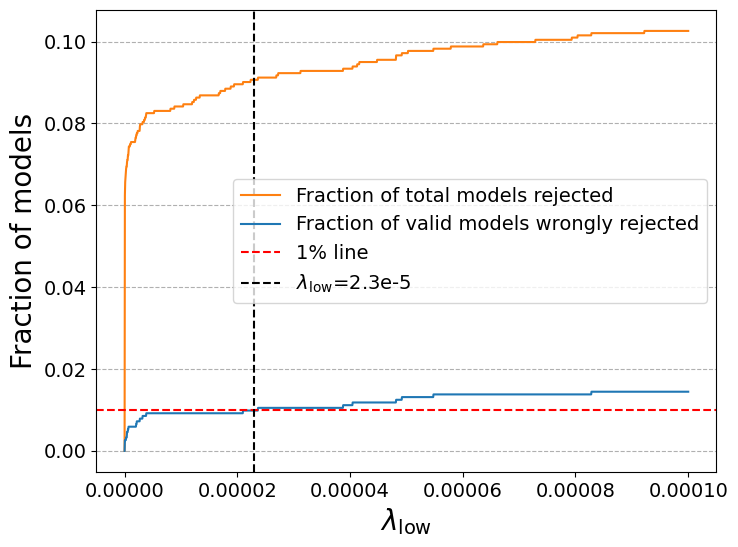

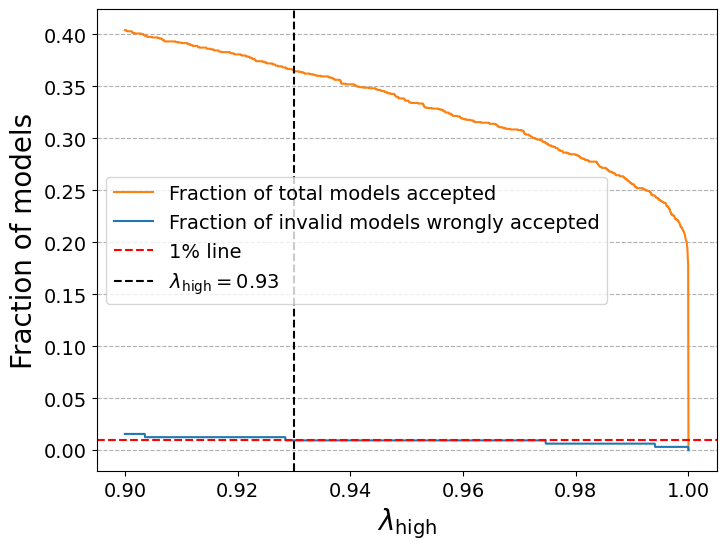

In [ ]:
def plot_rejections_by_cutoff(true_values, predicted_values, num_points=100, x_range=1):

    # Calculate which models should be rejected (CLs < 0.05, which also selects Is_Valid == 0)
    true_cutoff = 0.05
    target_rejections = true_values < true_cutoff
    target_accepted = np.logical_not(target_rejections)
    
    # Create array of test cutoffs
    low_test_cutoffs = np.linspace(0,x_range,num=num_points)
    high_test_cutoffs = np.linspace(0.9,1,num=num_points)
 
    # Create array of incorrect rejection
    incorrect_rejections = []
    total_rejections = []
    
    # Create array of incorrect inclusions
    incorrect_inclusions = []
    total_inclusions = []

    for cutoff in low_test_cutoffs:

        # Calculate which predictions are rejected by chosen cutoff
        rejected_predictions = predicted_values < cutoff
        
        # Calculate fraction of models that should have been accepted but were rejected.
        # If rejected_predictions[i] > target_rejections[i] then rejected_predictions[i] == True and target_rejections[i] == False
        total_wrongly_rejected = (rejected_predictions > target_rejections).sum()
        fraction_wrongly_rejected = total_wrongly_rejected / target_accepted.sum()
        
        # Calculate fraction of all models rejected
        fraction_rejeceted = rejected_predictions.sum() / len(true_values)
        
        # Store these values for plotting
        incorrect_rejections.append(fraction_wrongly_rejected)
        total_rejections.append(fraction_rejeceted)
        
    for cutoff in high_test_cutoffs:
        
        # Calculate which predictions are accepted by chosen cutoff
        accepted_predictions = predicted_values > cutoff
        
        # Calculate fraction of models that should have been rejected but were accepted
        total_wrongly_accepted = (accepted_predictions > target_accepted).sum()
        fraction_wrongly_accepted = total_wrongly_accepted / target_rejections.sum()
        
        # Calculate fraction of all models accepted
        fraction_accepted = accepted_predictions.sum() / len(true_values)
        
        # Store these values for plotting
        incorrect_inclusions.append(fraction_wrongly_accepted)
        total_inclusions.append(fraction_accepted)
    
    # Plot fraction of rejected models against cutoff
    plt.figure(figsize=(8, 6))
    plt.plot(low_test_cutoffs, total_rejections, c='#fe8011')
    plt.plot(low_test_cutoffs, incorrect_rejections)
    hline = 0.01
    plt.axhline(hline, c='red', linestyle='dashed')
    vline = 2.3e-5
    plt.axvline(vline, c='black', linestyle='dashed')
    plt.xlabel(r"$\lambda_{\text{low}}$", fontsize=20)
    plt.ylabel("Fraction of models", fontsize=20)
    plt.grid(axis='y', linestyle='--')
    plt.legend(["Fraction of total models rejected", "Fraction of valid models wrongly rejected", r'1% line', r'$\lambda_{\text{low}}$=2.3e-5'])
    #plt.title("Fraction of models excluded against confidence cutoff")
    
    #plt.savefig("../plots/CLs_predictor_performance/4l_128n_75e_MAE_plots/low_cutoff_graph.pdf")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.plot(high_test_cutoffs, total_inclusions, c='#fe8011')
    plt.plot(high_test_cutoffs, incorrect_inclusions)
    plt.axhline(0.01, color="red", linestyle='dashed')
    plt.axvline(0.93, color="black", linestyle='dashed')
    plt.xlabel(r"$\lambda_{\text{high}}$", fontsize=20)
    plt.ylabel("Fraction of models", fontsize=20)
    plt.grid(axis='y', linestyle='--')
    plt.legend(["Fraction of total models accepted", "Fraction of invalid models wrongly accepted", r'1% line', r"$\lambda_{\text{high}}=0.93$"])
    #plt.title("Fraction of models accepted against confidence cutoff")
    
    #plt.savefig("../plots/CLs_predictor_performance/4l_128n_75e_MAE_plots/high_cutoff_graph.pdf")
    plt.show()
    
plot_rejections_by_cutoff(targets, predictions, len(targets), 0.0001)

In [119]:
# Calculate which models should be rejected (CLs < 0.05, which also selects Is_Valid == 0)
true_cutoff = 0.05
target_rejections = targets < true_cutoff
target_accepted = np.logical_not(target_rejections)

# Calculate which predictions are rejected by chosen cutoff
rejected_predictions = predictions < 2.3e-5

# Calculate fraction of models that should have been accepted but were rejected.
# If rejected_predictions[i] > target_rejections[i] then rejected_predictions[i] == True and target_rejections[i] == False
total_wrongly_rejected = (rejected_predictions > target_rejections).sum()
fraction_wrongly_rejected = total_wrongly_rejected / target_accepted.sum()

# Calculate fraction of all models rejected
fraction_rejeceted = rejected_predictions.sum() / len(targets)

print(fraction_rejeceted)
print(fraction_wrongly_rejected)

0.09066232356134636
0.009861932938856016


In [120]:
# Calculate which models should be rejected (CLs < 0.05, which also selects Is_Valid == 0)
true_cutoff = 0.05
target_rejections = targets < true_cutoff
target_accepted = np.logical_not(target_rejections)

# Calculate which predictions are accepted by chosen cutoff
accepted_predictions = predictions > 0.93

# Calculate fraction of models that should have been rejected but were accepted
total_wrongly_accepted = (accepted_predictions > target_accepted).sum()
fraction_wrongly_accepted = total_wrongly_accepted / target_rejections.sum()

# Calculate fraction of all models accepted
fraction_accepted = accepted_predictions.sum() / len(targets)
print(fraction_accepted)
print(fraction_wrongly_accepted)

0.36536373507057546
0.009345794392523364


(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='True CL$_s$', ylabel='Prediction error (MAE)'>)

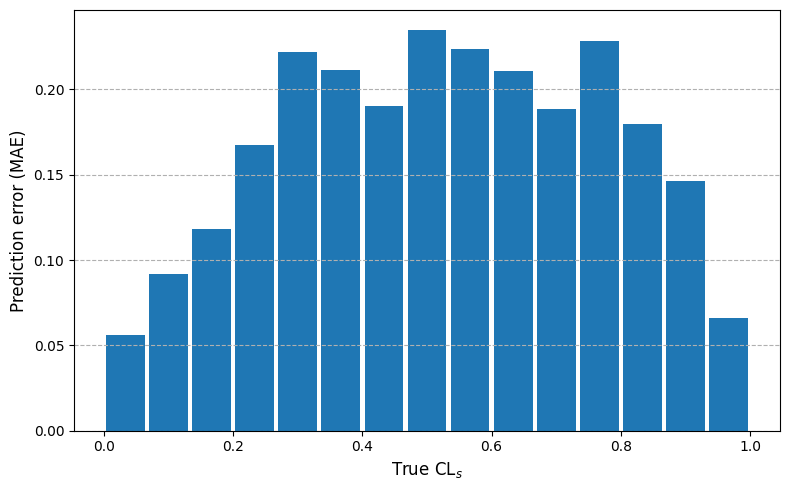

In [ ]:
def plot_mae_by_bins(true_CLs, predicted_CLs, num_bins, bin_parameter):
    
    # Calculate absolute errors
    abs_errors = np.abs(true_CLs - predicted_CLs)
    
    # Create bins
    bins = np.linspace(bin_parameter.min(), bin_parameter.max(), num_bins + 1)
    mae_by_bin = []
    bin_centers = []
    
    for i in range(num_bins):
        # Find indices of values in this bin
        bin_mask = (bin_parameter >= bins[i]) & (bin_parameter < bins[i+1])
        
        # Calculate MAE for this bin
        if np.sum(bin_mask) > 0:
            mae = np.mean(abs_errors[bin_mask])
            mae_by_bin.append(mae)
            bin_centers.append((bins[i] + bins[i+1]) / 2)
    
    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(bin_centers, mae_by_bin, width=(bins[1]-bins[0])*0.9)
    
    #plt.title('Mean absolute error of CLs prediction in bins of true CLs (weighted loss)')
    plt.xlabel(r'True CL$_s$', fontsize=12)
    plt.ylabel('Prediction error (MAE)', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    
    # Add mae values on top of each bar
    #for i, mae in enumerate(mae_by_bin):
        #plt.text(bin_centers[i], mae, f'{mae:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    #plt.savefig('../plots/CLs_predictor_performance/4l_128n_75e_MAE_plots/MAE_by_CLs_bins.pdf')
    
    return plt.gcf(), plt.gca()

plot_mae_by_bins(targets, predictions, num_bins=15, bin_parameter=df["Final__CLs"])

In [26]:
# Create dataframe of wrongly rejected models, for which predicted CLs < 3.5e-5 and true CLs > 0.05
comparison_df = input_df
comparison_df["Predictions"] = predictions
pred_reject = comparison_df["Predictions"] < 3.5e-5
target_reject = comparison_df["Final__CLs"] < 0.05
incorrectly_rejected_models = comparison_df.loc[pred_reject > target_reject]

# Create dataframe of correctly rejected models
correctly_predicted_models = comparison_df.loc[pred_reject == target_reject]
correctly_rejected_models = correctly_predicted_models.loc[pred_reject == True]
len(correctly_rejected_models)

156

In [ ]:
# Create array of column names to label plot of parameter means
col_names = []
for col in input_df.columns:
    col_names.append(col)
col_names = col_names[0:-2]
print(col_names)

['M_1', 'M_2', 'mu', 'tan_beta', 'M_3', 'At', 'Ab', 'Atau', 'mA', 'mqL3', 'mtR', 'mbR']


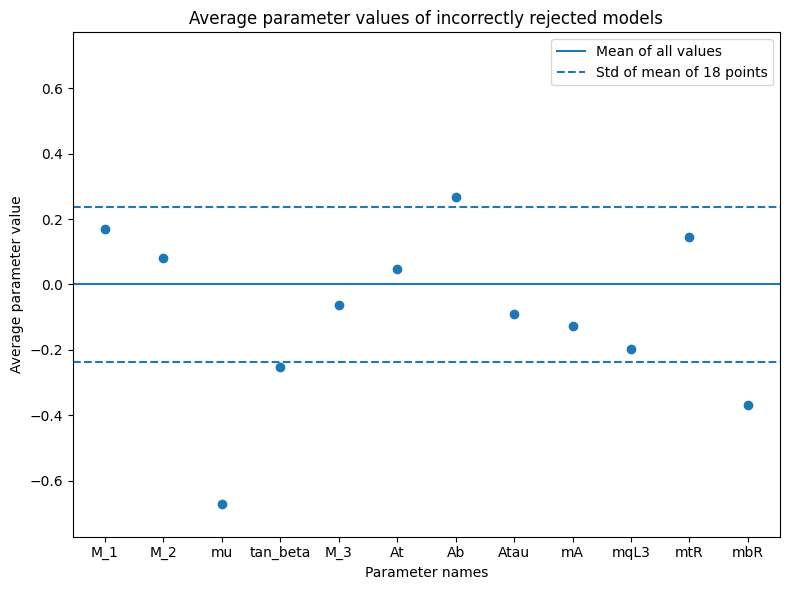

In [ ]:
# Extract average of each parameter for correctly rejected models
col_avg = correctly_rejected_models.mean(axis=0).values
num_models = len(correctly_rejected_models)

# Remove predictions and targets
col_avg = col_avg[0:-2]

# Plot column averages against column number
plt.figure(figsize=(8,6))
plt.axhline(0)
std_of_mean = 1/np.sqrt(num_models)
plt.axhline(std_of_mean, linestyle="--")
plt.axhline(-std_of_mean, linestyle="--")
y_lim = max(abs(col_avg)) + 0.1
plt.ylim(top=y_lim, bottom=-y_lim)
plt.title("Average parameter values of correctly rejected models")
plt.xlabel("Parameter names")
plt.ylabel("Average parameter value")
plt.legend(["Mean of all values", "Std of mean of 156 points"])
plt.scatter(col_names, col_avg)

plt.tight_layout()
#plt.savefig("plots/CLs_predictor_performance/right_prediction_parameter_averages.pdf")
plt.show()

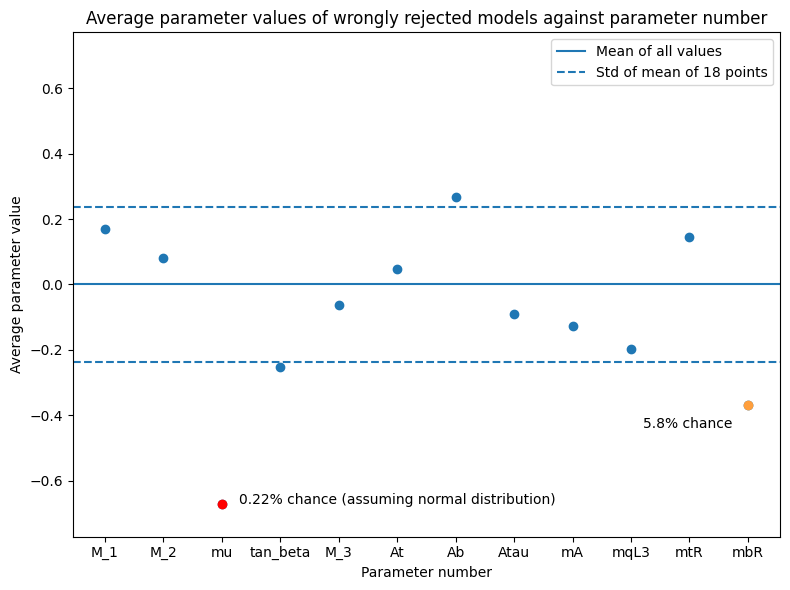

In [ ]:
# Extract average of each parameter for incorrectly rejected models
col_avg = incorrectly_rejected_models.mean(axis=0).values

# Remove predictions and targets
col_avg = col_avg[0:-2]

# Plot column averages against column number, highlighting outliers
plt.figure(figsize=(8,6))
plt.axhline(0)
std_of_mean = 1/np.sqrt(18)
plt.axhline(std_of_mean, linestyle="--")
plt.axhline(-std_of_mean, linestyle="--")
y_lim = max(abs(col_avg)) + 0.1
plt.ylim(top=y_lim, bottom=-y_lim)
plt.title("Average parameter values of wrongly rejected models against parameter number")
plt.xlabel("Parameter number")
plt.ylabel("Average parameter value")
plt.legend(["Mean of all values", "Std of mean of 18 points"])
plt.scatter(col_names, col_avg)

plt.text(2+0.3,col_avg[2],"0.22% chance (assuming normal distribution)")
plt.scatter(2,col_avg[2],c="r")

plt.text(9.2, col_avg[11]-0.07, "5.8% chance")
plt.scatter(11,col_avg[11],c="#ff9f3d")

plt.tight_layout()
#plt.savefig("plots/CLs_predictor_performance/wrong_prediction_parameter_averages.pdf")
plt.show()

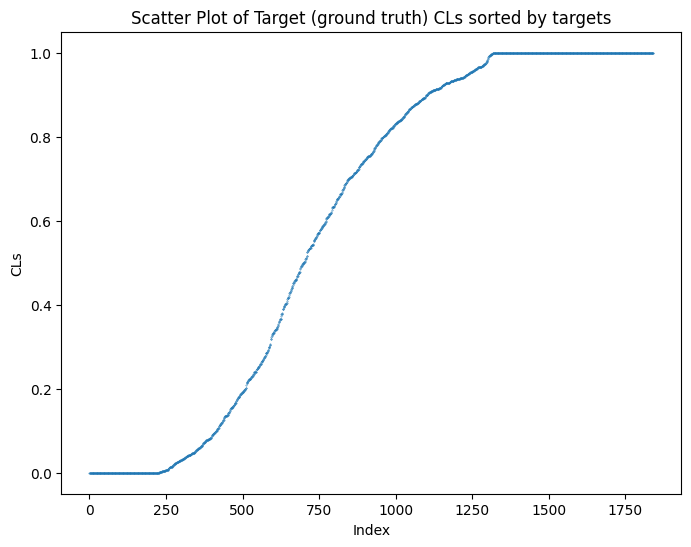

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(targets)), targets, s=0.1)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("CLs")
plt.title(f"Scatter Plot of Target (ground truth) CLs sorted by targets")

# Save the plot
# plt.savefig(f"plots/DM_predictor_performance/DM-targets.png")

# Show the plot
plt.show()

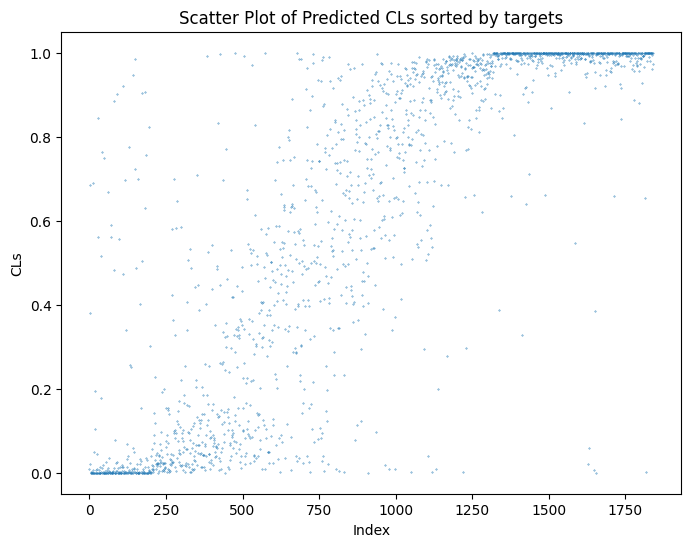

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predictions)), predictions, s=0.1)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("CLs")
plt.title(f"Scatter Plot of Predicted CLs sorted by targets")

# Save the plot
# plt.savefig(f"plots/DM_predictor_performance/DM-predictions.png")

# Show the plot
plt.show()